# vta - Mini Challenge - Gradient Descent 

Das Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis für numerische
Näherungsverfahren in höheren Dimensionen erlangen, insbesondere für den Gradient Descent
und dessen praktische Anwendung. Hierfür sollen Sie ein Jupyter Notebook erstellen und das
MNIST Dataset laden und erkunden. Anschließend sollen Sie ein neuronales Netzwerk erstellen
und trainieren, um die Bilder korrekt zu klassifizieren. Es dürfen nur die angegebenen Python
packages verwendet werden.  
Ziel dieser Aufgabe ist nicht nur, Ihre mathematischen Kenntnisse unter Beweis zu stellen, sondern
auch die entsprechende Kommunikation und Präsentation Ihrer Ergebnisse. Ihre Abgaben sollen
also nicht nur mathematisch korrekt, sondern auch leicht verständlich und reproduzierbar
sein. Genauere Angaben zu den Erwartungen an die Abgabe finden Sie in den Auswertungskriterien.
Dokumentieren Sie ihren Arbeitsfortschritt und Erkenntnisgewinn in Form eines Lerntagebuchs,
um Lernfortschritte, Schwierigkeiten und Erkenntnisse festzuhalten.
Die folgenden Aufgabenstellungen präzisieren die einzelnen Bearbeitungsschritte und geben die
Struktur des Notebooks vor.

Diese Challenge wurde im FS23 erarbeitet von:  
Patrik Schürmann   
Tobias Buess  
Si Ben Tran   

---

# Aufgabe 1 
Laden Sie das MNIST-Dataset mithilfe des torchvision-Pakets (Verwenden Sie das torchvision
Paket für diese Aufgabe) und verwenden Sie matplotlib, um sich einen Überblick über die Daten
zu verschaffen. Beschreiben Sie das grundlegenden Eigenschaften des Datensets, z.B. wie viele
und welche Daten es enthält.

**Dataset**
1) Sind Trainings und Testdaten des MNIST-Dataset korrekt mithilfe des torchvision-Pakets
geladen worden?
2) Die grundlegenden Eigenschaften des MNIST-Datasets werden richtig beschrieben.
3) Die Visualisierungen der Daten sind gut verständlich und representativ.

In [1]:
# Libraries Laden 
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import unittest

In [2]:
# 1. Trainings und Testdaten des MNIST-Dataset mithilfe torchvision laden

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

In [3]:
# 2. Eigenschaften des MNIST-Datasets beschreiben

# Ausgabe der Trainings- und Testdaten shape
print("Train Dataset Shape: ", train_dataset.data.shape)
print("Validation Dataset Shape: ", test_dataset.data.shape)

# Ausgabe der Anzahl der Trainings- und Testbilder
print(f"Anzahl der Trainingsbilder: {len(train_dataset.data)}")
print(f"Anzahl der Testbilder: {len(test_dataset.data)}")

# Dimension der Trainings- und Testbilder
print(f"Bildauflösung der Trainingsbilder: {train_dataset.data[0].shape}")
print(f"Bildauflösung der Testbilder: {test_dataset.data[0].shape}")

Train Dataset Shape:  torch.Size([60000, 28, 28])
Validation Dataset Shape:  torch.Size([10000, 28, 28])
Anzahl der Trainingsbilder: 60000
Anzahl der Testbilder: 10000
Bildauflösung der Trainingsbilder: torch.Size([28, 28])
Bildauflösung der Testbilder: torch.Size([28, 28])


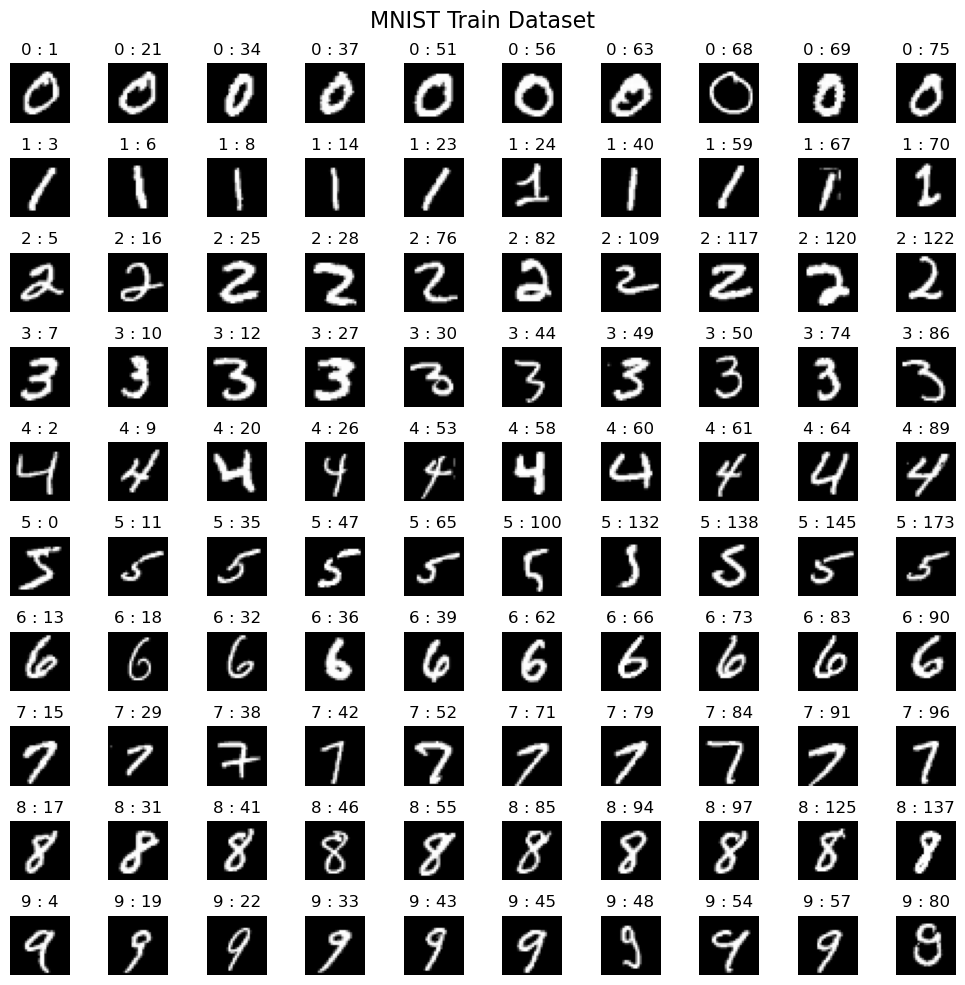

In [4]:
# 3. Visualisierung der Daten 

# Ausgabe der Bilder des MNIST-Datasets
def visualize_mnist_grid(dataset = train_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(10, 10, figsize=(10, 10))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(10):
        for j in range(10):
            # Finden des nächsten Bildes mit der Klasse i
            idx = np.where(dataset.targets == i)[0][j]
            # Laden des Bildes
            img = dataset.data[idx]
            # Anzeigen des Bildes
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].set_title(f"{i} : {idx}")
            axs[i, j].axis('off')
            fig.suptitle(title, fontsize=16)

    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_grid(train_dataset, "MNIST Train Dataset")

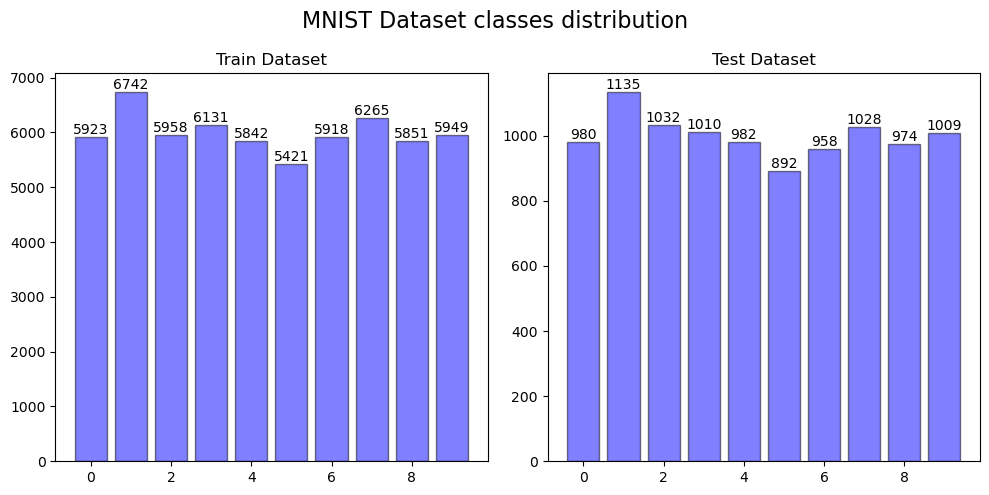

In [5]:
# 3. Visualisierung der Daten  

# visualize distritbution of classes with bar chart for train and test dataset
def visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(2):
        if i == 0:
            axs[i].bar(np.unique(dataset_train.targets), np.unique(dataset_train.targets, return_counts=True)[1], color='blue', alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Train Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_train.targets))):
                axs[i].text(j, np.unique(dataset_train.targets, return_counts=True)[1][j], np.unique(dataset_train.targets, return_counts=True)[1][j], ha='center', va='bottom')
        else:
            axs[i].bar(np.unique(dataset_test.targets), np.unique(dataset_test.targets, return_counts=True)[1], color = "blue", alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Test Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_test.targets))):
                axs[i].text(j, np.unique(dataset_test.targets, return_counts=True)[1][j], np.unique(dataset_test.targets, return_counts=True)[1][j], ha='center', va='bottom')
    
    fig.suptitle(title, fontsize=16)
    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = "MNIST Dataset classes distribution")


---

# Aufgabe 2
Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie die
Methoden forward, backward und update mithilfe von numpy. Schreiben sie geeignete Unittests,
um die Funktionsweise der Funktion zu prüfen.

**Linear Layer**

4) Die Klasse für ein lineares Layer wurde mit beliebig vielen Knoten korrekt implementiert.
5) Es wurden geeignete Unittests geschrieben, um die Funktionsweise der Klasse zu prüfen.
(Richtige Berechnung des Gradienten bei mind. zwei Datenpunkten)

In [6]:
# 4 Klasse Linear Layer mit beliebig vielen Knoten implementieren

class LinearLayer:
    """
    Eine Lineare Schicht in einem neuronalen Netzwerk. Die Schicht besteht aus einer Matrix von Gewichten,
    einem Vektor von Biaswerten und Methoden zur Vorwärts- und Rückwärtsdurchlauf durch die Schicht.
    """
    
    def __init__(self, input_dim, output_dim, activation_fn=None, activation_fn_derivative=None):
        """
        Initialisiert die Gewichte und Biaswerte der Schicht.
        
        :param input_dim: Dimension des Eingabevektors
        :param output_dim: Dimension des Ausgabevektors
        :param activation_fn: Aktivierungsfunktion
        :param activation_fn_derivative: Ableitung der Aktivierungsfunktion
        """
        
        stdv = 1. / np.sqrt(output_dim)
        self.weights = np.random.uniform(-stdv, stdv, (output_dim, input_dim))
        self.bias = np.random.uniform(-stdv, stdv, (1, output_dim))
        
        self.input = None
        self.activation_fn = activation_fn
        self.activation_fn_derivative = activation_fn_derivative
        self.grad_weights = None
        self.grad_bias = None
    
    def forward(self, input):
        """
        Führt einen Vorwärtsdurchlauf durch die Schicht aus.

        :param input: Eingabevektor mit Dimension (batch_size, input_dim)
        :return: Ausgabevektor mit Dimension (batch_size, output_dim)
        """
        self.input = input
        if self.activation_fn:
            return self.activation_fn(np.dot(input, self.weights.T) + self.bias)
        
        return np.dot(input, self.weights.T) + self.bias
    
    def backward(self, grad_output):
        """
        Führt einen Rückwärtsdurchlauf durch die Schicht aus und berechnet die Gradienten von Eingabe, Gewichten und Bias.
        
        :param grad_output: Gradienten der Ausgabe mit Dimension (batch_size, output_dim)
        :return: Gradienten der Eingabe mit Dimension (batch_size, input_dim), 
                 Gradienten der Gewichte mit Dimension (output_dim, input_dim),
                 Gradienten des Bias mit Dimension (1, output_dim)
        """
        if self.activation_fn_derivative:
            grad_input = np.dot(grad_output, self.weights) * self.activation_fn_derivative(self.input)
        else:
            grad_input = np.dot(grad_output, self.weights)
            
        self.grad_weights = np.dot(grad_output.T, self.input)
        self.grad_bias = np.sum(grad_output, axis=0, keepdims=True)

        return grad_input
    
    def update(self, learning_rate):
        """
        Aktualisiert die Gewichte und den Versatz der Schicht mit gegebener Lernrate und Gradienten.

        :param learning_rate: Lernrate, die für die Aktualisierung verwendet wird.
        """
        # Anpassung der Gewichte und Versätze mit gegebener Lernrate und Gradienten
        self.weights -= learning_rate * self.grad_weights
        self.bias -= learning_rate * self.grad_bias

#(ChatGPT)

# LinearLayer Klasse

Die `LinearLayer` Klasse repräsentiert eine lineare Schicht in einem neuronalen Netzwerk. Diese Schicht besteht aus einer Matrix von Gewichten, einem Vektor von Biaswerten und Methoden zur Vorwärts- und Rückwärtsdurchlauf durch die Schicht.

### Konstruktor

Der Konstruktor der Klasse `LinearLayer` initialisiert die Gewichte und Biaswerte der Schicht. Dabei wird eine zufällige Initialisierung mit einer Standardabweichung von `1/sqrt(output_dim)` verwendet.

- `input_dim`: Die Dimension des Eingabevektors.
- `output_dim`: Die Dimension des Ausgabevektors.
- `activation_fn`: Die Aktivierungsfunktion der Schicht.
- `activation_fn_derivative`: Die Ableitung der Aktivierungsfunktion.

### forward Methode

Die `forward` Methode führt einen Vorwärtsdurchlauf durch die Schicht aus. Dabei wird der Eingabevektor mit den Gewichten multipliziert und der Biasvektor addiert. Falls eine Aktivierungsfunktion vorhanden ist, wird sie angewendet.

- `input`: Der Eingabevektor mit der Dimension `(batch_size, input_dim)`.
- Rückgabe: Der Ausgabevektor mit der Dimension `(batch_size, output_dim)`.

### backward Methode

Die `backward` Methode führt einen Rückwärtsdurchlauf durch die Schicht aus und berechnet die Gradienten von Eingabe, Gewichten und Bias. Dabei wird der Gradienten der Ausgabe mit der Transponierten der Gewichtsmatrix multipliziert und falls eine Aktivierungsfunktion vorhanden ist, wird ihre Ableitung mit dem resultierenden Vektor multipliziert.

- `grad_output`: Der Gradienten der Ausgabe mit der Dimension `(batch_size, output_dim)`.
- Rückgabe: Der Gradienten der Eingabe mit der Dimension `(batch_size, input_dim)`, der Gradienten der Gewichte mit der Dimension `(output_dim, input_dim)` und der Gradienten des Bias mit der Dimension `(1, output_dim)`.

### update Methode

Die `update` Methode aktualisiert die Gewichte und Bias der Schicht mit gegebener Lernrate und Gradienten.

- `learning_rate`: Die Lernrate, die für die Aktualisierung verwendet wird.


In [7]:
# 5. Geeigneter Unittest geschrieben und Funktionsweise der Klasse geprüft

class TestLinearLayer(unittest.TestCase):
    
    def test_forward_output_shape(self):
        # Testet, ob die Ausgabe der Vorwärtsdurchlaufmethode die erwartete Form hat
        input_dim = 2
        output_dim = 3
        layer = LinearLayer(input_dim, output_dim)
        x = np.random.randn(4, input_dim)
        output = layer.forward(x)
        expected_output_shape = (4, output_dim)
        self.assertEqual(output.shape, expected_output_shape)
    
    def test_backward_output_shape(self):
        # Testet, ob die Ausgabe der Rückwärtsdurchlaufmethode die erwartete Form hat
        input_dim = 2
        output_dim = 3
        layer = LinearLayer(input_dim, output_dim)
        x = np.random.randn(4, input_dim)
        output = layer.forward(x)
        grad_output = np.random.randn(4, output_dim)
        grad_input = layer.backward(grad_output)
        expected_grad_input_shape = (4, input_dim)
        self.assertEqual(grad_input.shape, expected_grad_input_shape)

# Lade die Testfunktionen
suite = unittest.TestLoader().loadTestsFromTestCase(TestLinearLayer)

# Führe die Tests aus
unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# TestLinearLayer Klasse

Die `TestLinearLayer` Klasse ist eine Unterklasse von `unittest.TestCase` und enthält Tests für die `LinearLayer` Klasse.

### test_forward_output_shape Methode

Die `test_forward_output_shape` Methode testet, ob die Ausgabe der Vorwärtsdurchlaufmethode die erwartete Form hat. Dabei wird eine Instanz der `LinearLayer` Klasse mit gegebener Eingabe- und Ausgabedimension erstellt. Dann wird eine zufällige Eingabe erstellt und die `forward` Methode aufgerufen. Die Form der Ausgabe wird mit der erwarteten Form verglichen.

### test_backward_output_shape Methode

Die `test_backward_output_shape` Methode testet, ob die Ausgabe der Rückwärtsdurchlaufmethode die erwartete Form hat. Dabei wird eine Instanz der `LinearLayer` Klasse mit gegebener Eingabe- und Ausgabedimension erstellt. Dann wird eine zufällige Eingabe erstellt und die `forward` Methode aufgerufen. Ein zufälliger Gradienten der Ausgabe wird erstellt und die `backward` Methode aufgerufen. Die Form des Gradienten der Eingabe wird mit der erwarteten Form verglichen.

### Test ausführen

Die `suite` Variable wird verwendet, um die Testfunktionen zu laden. Dann wird die `TextTestRunner` Klasse verwendet, um die Tests auszuführen und die Ergebnisse in der Konsole auszugeben.

---

# Aufgabe 3
Erstellen Sie ein neuronales Netzwerk in numpy mit einem Hidden Linear Layer und einem Output
Knoten. Trainieren Sie das Netzwerk darauf, die Ziffer 4 korrekt zu identifizieren (d.h. der Output
soll 1 für diese Ziffer und 0 für alle anderen Ziffern sein). Trainieren Sie das Netzwerk auf den
Trainingsdaten und evaluieren Sie es anhand von Testdaten. Verwenden Sie eine geeignete Loss-
Funktion sowie Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen
Sie Ihre Wahl mit einer Abwägung der Vor- und Nachteile. Diskutieren Sie kurz weitere Optionen
für Loss und Accuracy.

**Single Layer Model**

6) Das neuronale Netzwerk wurde mit einem Hidden Layer beliebiger Grösse und einem Output
Knoten korrekt implementiert.
7) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
8) Die Wahl wurde begründet und mit anderen mögliche Funktionen verglichen?
9) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex)?
10) Die geeignete Loss-Funktion und Accuracy-Funktion wurde korrekt implementiert.

In [8]:
# 6. Neuronales Netzwerk mit einem Hidden Layer und beliebger Größe 

class Sigmoid:
    """
    Sigmoid-Aktivierungsfunktion.
    """
    def __call__(self, x):
        """
        Wendet die Sigmoid-Aktivierungsfunktion auf eine gegebene Eingabe an.
        
        :param x: Eingabe
        :return: Ausgabe der Sigmoid-Aktivierungsfunktion
        """
        x_clipped = np.clip(x, -709, 709) # Begrenze die Werte von x, um Überlauf zu vermeiden
        return 1 / (1 + np.exp(-x_clipped))

    def derivative(self, x):
        """
        Berechnet die Ableitung der Sigmoid-Aktivierungsfunktion an der gegebenen Stelle.
        
        :param x: Stelle, an der die Ableitung berechnet werden soll
        :return: Ableitung der Sigmoid-Aktivierungsfunktion an der gegebenen Stelle
        """
        sigmoid_x = self.__call__(x)
        return sigmoid_x * (1 - sigmoid_x)
    
class Tanh:
    """
    tanh-Aktivierungsfunktion.
    """
    def __call__(self, x):
        """
        Wendet die tanh-Aktivierungsfunktion auf eine gegebene Eingabe an.

        :param x: Eingabe
        :return: Ausgabe der tanh-Aktivierungsfunktion
        """
        x_clipped = np.clip(x, -709, 709)  # Begrenze die Werte von x, um Überlauf zu vermeiden
        return np.tanh(x_clipped)

    def derivative(self, x):
        """
        Berechnet die Ableitung der tanh-Aktivierungsfunktion an der gegebenen Stelle.

        :param x: Stelle, an der die Ableitung berechnet werden soll
        :return: Ableitung der tanh-Aktivierungsfunktion an der gegebenen Stelle
        """
        return 1 - np.tanh(x)**2
    
class BinaryCrossEntropyLoss:
    """
    Eine Loss-Funktion, die die Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks anwendet.
    """
    def __call__(self, output, target):
        """
        Berechnet die Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks.
        
        :param output: Ausgabe des neuronalen Netzwerks
        :param target: Zielwerte
        :return: Binary Cross Entropy Loss
        """
        # clip values to avoid numerical instability
        output = np.clip(output, 1e-15, 1 - 1e-15)
        loss = -np.mean(target * np.log(output) + (1 - target) * np.log(1 - output))
        return loss
    
    def gradient(self, output, target):
        """
        Berechnet den Gradienten der Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks.
        
        :param output: Ausgabe des neuronalen Netzwerks
        :param target: Zielwerte
        :return: Gradient der Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks
        """
        # clip values to avoid numerical instability
        output = np.clip(output, 1e-15, 1 - 1e-15)
        grad = (output - target) / (output * (1 - output))
        return grad
    
class NeuralNetwork:
    """
    Ein einfaches neuronales Netzwerk mit einer linearen Schicht und einer tanh-Aktivierungsfunktion.
    """
    def __init__(self, input_nodes, hidden_nodes):
        """
        Initialisiert die lineare Schicht und die Aktivierungsfunktion des neuronalen Netzwerks.

        :param input_nodes: Anzahl der Input-Nodes
        :param hidden_nodes: Anzahl der Hidden-Nodes
        """
        self.layer1 = LinearLayer(input_nodes, hidden_nodes, activation_fn=Tanh(), activation_fn_derivative=Tanh().derivative)
        self.layer2 = LinearLayer(hidden_nodes, 1, activation_fn=Sigmoid(), activation_fn_derivative=Sigmoid().derivative)
        self.loss_fn = BinaryCrossEntropyLoss()

    def forward(self, input):
        """
        Führt einen Vorwärtsdurchlauf durch das neuronale Netzwerk durch.

        :param input: Eingabevektor
        :return: Ausgabevektor des neuronalen Netzwerks
        """
        out = self.layer1.forward(input)
        out = self.layer2.forward(out)
        return out

    def backward(self, input, target):
        """
        Führt einen Rückwärtsdurchlauf durch das neuronale Netzwerk durch und berechnet die Gradienten
        für die Gewichte und den Bias der linearen Schichten.

        :param input: Eingabevektor
        :param target: Zielwerte
        :return: das aktualisierte neuronale Netzwerk
        """
        # Vorwärtsdurchlauf
        output = self.forward(input)

        # Berechne Loss und Gradienten
        grad_loss = self.loss_fn.gradient(output, target)

        # Rückwärtsdurchlauf
        grad_output = self.layer2.backward(grad_loss)
        grad_input = self.layer1.backward(grad_output)

        # Rückgabe des aktualisierten neuronalen Netzwerks
        return self

    def update(self, learning_rate):
        """
        Aktualisiert die Gewichte und den Bias des neuronalen
            :param learning_rate: Lernrate
        """
        self.layer1.update(learning_rate)
        self.layer2.update(learning_rate)

    def loss(self, input, target):
        """
        Berechnet den Loss des neuronalen Netzwerks auf einer gegebenen Eingabe und den zugehörigen Zielwerten.

        :param input: Eingabevektor
        :param target: Zielwerte
        :return: Loss des neuronalen Netzwerks auf der gegebenen Eingabe und den zugehörigen Zielwerten
        """
        output = self.forward(input)
        return self.loss_fn(output, target)
    
    def accuracy(self, input, target, threshold=0.5):
        """
        Berechnet die Genauigkeit des neuronalen Netzwerks auf einer gegebenen Eingabe und den zugehörigen Zielwerten.

        :param input: Eingabevektor
        :param target: Zielwerte
        :param threshold: Schwellenwert für die Klassifikation
        :return: Genauigkeit des neuronalen Netzwerks auf der gegebenen Eingabe und den zugehörigen Zielwerten
        """
        output = self.forward(input)
        output[output >= threshold] = 1
        output[output < threshold] = 0
        hits = np.sum(output == target)
        size = target.size
        return hits / size
    
    def weighted_accuracy(self, input, target, threshold=0.5):
        """
        Berechnet die gewichtete Genauigkeit des neuronalen Netzwerks auf einer gegebenen Eingabe und den zugehörigen Zielwerten.

        :param input: Eingabevektor
        :param target: Zielwerte
        :param threshold: Schwellenwert für die Klassifikation
        :return: Gewichtete Genauigkeit des neuronalen Netzwerks auf der gegebenen Eingabe und den zugehörigen Zielwerten
        """
        output = self.forward(input)
        output[output >= threshold] = 1
        output[output < threshold] = 0
        tp = np.sum(output * target)
        tn = np.sum((1 - output) * (1 - target))
        fp = np.sum(output * (1 - target))
        fn = np.sum((1 - output) * target)
        accuracy_class1 = tp / (tp + fn)
        accuracy_class0 = tn / (tn + fp)
        return (accuracy_class1 + accuracy_class0) / 2

    def f1_score(self, input, target, threshold=0.5):
        """
        Berechnet den F1-Score des neuronalen Netzwerks auf einer gegebenen Eingabe und den zugehörigen Zielwerten.

        :param input: Eingabevektor
        :param target: Zielwerte
        :param threshold: Schwellenwert für die Klassifikation
        :return: F1-Score des neuronalen Netzwerks auf der gegebenen Eingabe und den zugehörigen Zielwerten
        """
        output = self.forward(input)
        output[output >= threshold] = 1
        output[output < threshold] = 0
        tp = np.sum(output * target)
        fp = np.sum(output * (1 - target))
        fn = np.sum((1 - output) * target)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        return 2 * precision * recall / (precision + recall)
    
#(ChatGPT)

## Klassenbeschreibung

### `Sigmoid`

Diese Klasse repräsentiert die Sigmoid-Aktivierungsfunktion. Die Klasse hat eine `__call__`-Methode, die die Sigmoid-Aktivierungsfunktion auf eine gegebene Eingabe anwendet, sowie eine `derivative`-Methode, die die Ableitung der Sigmoid-Aktivierungsfunktion an der gegebenen Stelle berechnet.

### `Tanh`

Diese Klasse repräsentiert die tanh-Aktivierungsfunktion. Die Klasse hat eine `__call__`-Methode, die die tanh-Aktivierungsfunktion auf eine gegebene Eingabe anwendet, sowie eine `derivative`-Methode, die die Ableitung der tanh-Aktivierungsfunktion an der gegebenen Stelle berechnet.

### `BinaryCrossEntropyLoss`

Diese Klasse repräsentiert die Binary Cross Entropy Loss-Funktion. Die Klasse hat eine `__call__`-Methode, die die Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks anwendet, sowie eine `gradient`-Methode, die den Gradienten der Binary Cross Entropy Loss auf die Ausgabe des neuronalen Netzwerks berechnet.

### `NeuralNetwork`

Diese Klasse repräsentiert ein einfaches neuronales Netzwerk mit einer linearen Schicht und einer tanh-Aktivierungsfunktion. Die Klasse hat eine `__init__`-Methode, die die lineare Schicht und die Aktivierungsfunktion des neuronalen Netzwerks initialisiert, sowie `forward`, `backward`, `update`, `loss`, `accuracy`, `weighted_accuracy` und `f1_score`-Methoden, die Vorwärts- und Rückwärtsdurchläufe durch das Netzwerk durchführen und die entsprechenden Ergebnisse liefern.

Input array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Input array shape:
 (60000, 784)
Input array target:
 [[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]
Input array target shape:
 (60000, 1)
Epoch: 0

- loss: 1.0985364880389727
- accuracy: 0.9026333333333333
- w. accuracy: 0.5


C:\Users\schue\AppData\Local\Temp\ipykernel_20652\384851996.py:198: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


- f1: nan

Epoch: 5

- loss: 31.17657260988662
- accuracy: 0.09736666666666667
- w. accuracy: 0.5
- f1: 0.1774551198323259



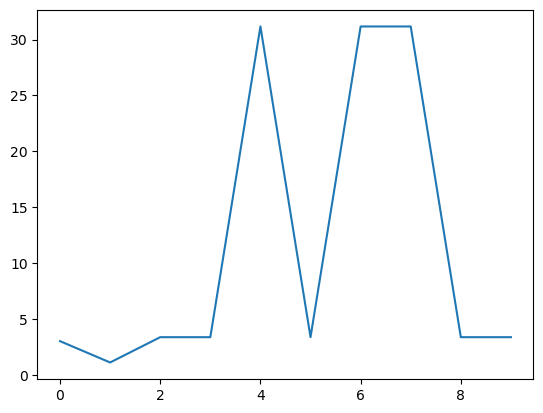

In [9]:
# 6. Neuronales Netzwerk mit einem Hidden Layer und beliebger Größe 

np.random.seed(123)

# Erzeugen einer Instanz 
net = NeuralNetwork(input_nodes=28*28, hidden_nodes=30)

# Erzeugen eines Beispiel Arrayys mit 3 Beobachtungen vom MNIST Datensatz
input_array = np.array(train_dataset.data.view(-1, 28*28))
# Umwandeln der Labels in numpy array
target = np.array(train_dataset.targets.reshape(-1, 1))

# Array Ausgeben
print("Input array:\n", input_array)
print("Input array shape:\n", input_array.shape)

# Transform Labels into 0 and 1 (everything else is 0 except 4, which is 1)
target = np.where(target == 4, 1, 0)

# Array Labels
print("Input array target:\n", target)
print("Input array target shape:\n", target.shape)

#beispiel für backprop
loss = []
for i in range(10):
    loss.append(net.loss(input_array, target))
    net.backward(input_array, target).update(1e-8)

    if i % 5 == 0:
        print(f"Epoch: {i}\n")
        print(f"- loss: {net.loss(input_array, target)}")
        print(f"- accuracy: {net.accuracy(input_array, target)}")
        print(f"- w. accuracy: {net.weighted_accuracy(input_array, target)}")
        print(f"- f1: {net.f1_score(input_array, target)}\n")

plt.plot(loss)
plt.show()

In [10]:
# 7. Geeignete Loss- und Accuracy-Funktionen verwenden

In [11]:
# CODE

In [12]:
# CODE

## Mathematische Definitionen

Mathematische Definitionen der Loss-Funktion und Accuracy-Funktion.

Die Cross-Entropy ist eine mathematische Funktion, die den Fehler zwischen einer Vorhersage und den tatsächlichen Zielwerten misst. Mathematically, die Cross-Entropy kann für ein einzelnes Beispiel (i) wie folgt definiert werden:

$$CE(y, \hat{y}) = -(y * \log(\hat{y}) + (1 - y) * \log(1 - \hat{y}))$$

Wobei y_i die tatsächlichen Zielwerte und \hat{y}_i die Vorhersagen des Modells für das i-te Beispiel sind. Die Cross-Entropy berechnet für jedes Beispiel einen Fehlerwert und summiert diese Fehlerwerte auf, um die Gesamtfehler des Modells zu erhalten.

Im Falle eines Multi-Klassen-Problems (mit C Klassen) kann die Cross-Entropy für ein einzelnes Beispiel (i) wie folgt berechnet werden:

$$CE(y, \hat{y}) = -\sum_{j=1}^{C} y_{j} * \log(\hat{y}_{j})$$

Wobei y_{i,j} den tatsächlichen Wert für die j-te Klasse des i-ten Beispiels darstellt und \hat{y}_{i,j} die Vorhersage des Modells für diese Klasse ist. Die Summe $\sum_{j=1}^{C}$ berechnet den Fehler für alle Klassen und das Beispiel i.

Die Confusion Matrix (auch Verwirrungsmatrix genannt) ist eine Tabelle, die die Anzahl der Vorhersagen des Klassifikators für jede Klasse gegen die tatsächlichen Klassen enthält. Die Matrix hat normalerweise eine Größe von $C \times C$, wobei $C$ die Anzahl der Klassen ist. Die folgende Gleichung zeigt eine allgemeine Darstellung der Confusion Matrix:

|                    | Actually Positiv     | Actually Negative   |
|--------------------|----------------------|---------------------|
| Predicted Positiv  | True Positiv (TP)    | False Positiv (FP)  |
| Predicted Negative | False Negatives (FN) | True Negatives (TN) |

Dabei steht TP für die Anzahl der richtig vorhergesagten positiven Beispiele, FN für die Anzahl der falsch vorhergesagten negativen Beispiele, FP für die Anzahl der falsch vorhergesagten positiven Beispiele und TN für die Anzahl der richtig vorhergesagten negativen Beispiele. Die Confusion Matrix kann verwendet werden, um verschiedene Evaluationsmetriken zu berechnen, wie zum Beispiel Accuracy, Precision, Recall, F1-Score und weitere.

Die Accuracy (auch Korrektheitsrate genannt) gibt an, wie oft der Klassifikator korrekt vorhergesagt hat und wird als Prozentsatz der korrekten Vorhersagen berechnet.

\begin{equation}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

Wobei $TP$ die Anzahl der wahren positiven, $TN$ die Anzahl der wahren negativen, $FP$ die Anzahl der falsch positiven und $FN$ die Anzahl der falsch negativen Vorhersagen sind.

Recall (auch True Positive Rate genannt) gibt an, wie viele relevante Elemente tatsächlich als solche erkannt wurden. Es ist das Verhältnis zwischen der Anzahl der tatsächlich positiven Elemente und der Summe aus tatsächlich positiven und falsch negativen Elementen.

\begin{equation}
Recall = \frac{TP}{TP + FN}
\end{equation}

Precision gibt an, wie viele der als positiv klassifizierten Elemente tatsächlich relevant sind. Es ist das Verhältnis zwischen der Anzahl der tatsächlich positiven Elemente und der Summe aus tatsächlich positiven und falsch positiven Elementen.

\begin{equation}
Precision = \frac{TP}{TP + FP}
\end{equation}

Der F1-Score ist das harmonische Mittel von Recall und Precision und gibt an, wie gut der Klassifikator sowohl bei der Identifizierung von relevanten als auch bei der Vermeidung von falsch positiven Ergebnissen ist.

\begin{equation}
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
\end{equation}

Die gewichtete Genauigkeit (auch Balanced Accuracy genannt) ist ein Maß dafür, wie gut ein Klassifikator mit ungleicher Klassenverteilung funktioniert. Es ist das arithmetische Mittel der Genauigkeit der einzelnen Klassen.

\begin{equation}
Weighted\ Accuracy = \frac{1}{2} \cdot \Bigg( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \Bigg)
\end{equation}

Wobei $TP$ die Anzahl der wahren positiven, $FN$ die Anzahl der falsch negativen, $TN$ die Anzahl der wahren negativen und $FP$ die Anzahl der falsch positiven Vorhersagen sind.

(ChatGPT)

---

# Aufgabe 4
Trainieren Sie das Netzwerk mit verschiedenen Lernraten und Größen des Hidden Layers. Verfolgen
Sie während des Trainings die Entwicklung der Loss- und Accuracy-Funktionen auf Trainingsund
Testdatensätzen und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Größe die
besten Ergebnisse in geringster Zeit liefert.

**Single Layer Model: Training**

11) Das Netzwerk wurde korrekt auf den Trainingsdaten trainiert.
12) Das Netzwerk wurde korrekt auf den Testdaten evaluiert.
13) Es wurden verschiedene Lernraten und Größen des Hidden Layers sinnvoll ausprobiert.
14) Die Entwicklung der Loss- und Accuracy-Funktionen wurden auf Trainings- und Testdatensätzen
korrekt verfolgt und leicht nachvollziehbar dargestellt?
1
15) Die Wahl von Lernrate und Hidden Layer-Größe wurde nachvollziehbar entschieden und
begründet.

In [13]:
# 11. Netzwerk auf Trainigsdaten trainieren

In [14]:
# 12. Netzwerk auf Testdaten evaluieren

In [15]:
# 13. Verschiedene Lernraten und Größen des Hidden Layers ausprobiert

In [16]:
# 14. Entwicklung der Loss- und Accuracy-Funktionen wurden auf Trainings- und Testdatensätzen

In [21]:
np.random.seed(718)


# Erzeugen von numpy Train und numpy test
train_mnist_X = np.array(train_dataset.data.view(-1, 28*28))
test_mnist_X = np.array(test_dataset.data.view(-1, 28*28))

# Umwandeln der Labels in numpy array
train_mnist_y = np.array(train_dataset.targets.reshape(-1, 1))
test_mnist_y = np.array(test_dataset.targets.reshape(-1, 1))

# Transform Labels into one-hot encoded format
train_mnist_y = np.where(train_mnist_y == 4, 1, 0)
test_mnist_y = np.where(test_mnist_y == 4, 1, 0)


def train(model, epoch = 10, lr = 1e-6, loss_plot = True, w_accuracy_plot = True, verbose = True, no_nodes=0):
    epoch = epoch
    loss_train_, loss_test_ = [], []
    accuracy_train, accuracy_test = [], []
    w_accuracy_train, w_accuracy_test = [], []
    f1_train_, f1_test_ = [], []

    for i in range(epoch):
        loss_train = model.loss(train_mnist_X, train_mnist_y)
        loss_test = model.loss(test_mnist_X, test_mnist_y)
        loss_train_.append(loss_train)
        loss_test_.append(loss_test)

        train_acc = model.accuracy(train_mnist_X, train_mnist_y)
        test_acc = model.accuracy(test_mnist_X, test_mnist_y)
        accuracy_train.append(train_acc)
        accuracy_test.append(test_acc)

        train_w_acc = model.weighted_accuracy(train_mnist_X, train_mnist_y)
        test_w_acc = model.weighted_accuracy(test_mnist_X, test_mnist_y)
        w_accuracy_train.append(train_w_acc)
        w_accuracy_test.append(test_w_acc)

        f1_train = model.f1_score(train_mnist_X, train_mnist_y)
        f1_test = model.f1_score(test_mnist_X, test_mnist_y)
        f1_train_.append(f1_train)
        f1_test_.append(f1_test)

        # backprop
        model.backward(train_mnist_X, train_mnist_y).update(learning_rate = lr)
        if verbose:
            if i % 5 == 0:
                print(f"Trainset | Epoch: {i+1}/{epoch} - loss: {loss_train:.4f} - accuracy: {train_acc:.4f} - w. accuracy: {train_w_acc:.4f} - f1: {f1_train:.4f}")
                print(f"Testset | Epoch: {i+1}/{epoch} - loss: {loss_test:.4f} - accuracy: {test_acc:.4f} - w. accuracy: {test_w_acc:.4f} - f1: {f1_test:.4f}")
                print("-" * 100)

    if loss_plot:
        plt.figure(figsize=(10,8))
        plt.plot(range(epoch), loss_train_, label='trainset', alpha = 0.5, color = "red")
        plt.plot(range(epoch), loss_test_, label='testset', alpha = 0.5, color = "blue")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title("Entwicklung der Loss Funktion mit {} Nodes im Hidden Layer und Learning Rate {}".format(no_nodes, lr))
        plt.legend()
        plt.show()

    if w_accuracy_plot:
        plt.figure(figsize=(10,8))
        plt.plot(range(epoch), w_accuracy_train, label='trainset', alpha = 0.5, color = "red")
        plt.plot(range(epoch), w_accuracy_test, label='testset', alpha = 0.5, color = "blue")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title("Entwicklung der Weighted Accuracy mit {} Nodes im Hidden Layer und Learning Rate {}".format(no_nodes, lr))
        plt.legend()
        plt.show()

Trainset | Epoch: 1/15 - loss: 2.2410 - accuracy: 0.4241 - w. accuracy: 0.4872 - f1: 0.1605
Testset | Epoch: 1/15 - loss: 2.1372 - accuracy: 0.4384 - w. accuracy: 0.5076 - f1: 0.1719
----------------------------------------------------------------------------------------------------


C:\Users\schue\AppData\Local\Temp\ipykernel_20652\384851996.py:198: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / (tp + fp)


Trainset | Epoch: 6/15 - loss: 3.3629 - accuracy: 0.9026 - w. accuracy: 0.5000 - f1: nan
Testset | Epoch: 6/15 - loss: 3.3917 - accuracy: 0.9018 - w. accuracy: 0.5000 - f1: nan
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.8525 - accuracy: 0.9464 - w. accuracy: 0.8941 - f1: 0.7507
Testset | Epoch: 11/15 - loss: 1.9515 - accuracy: 0.9435 - w. accuracy: 0.8897 - f1: 0.7409
----------------------------------------------------------------------------------------------------


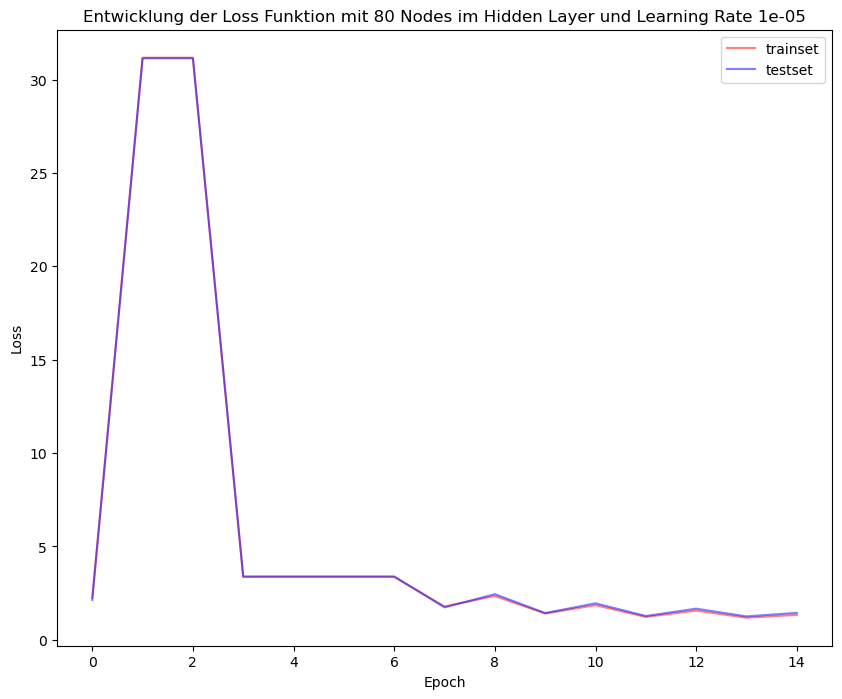

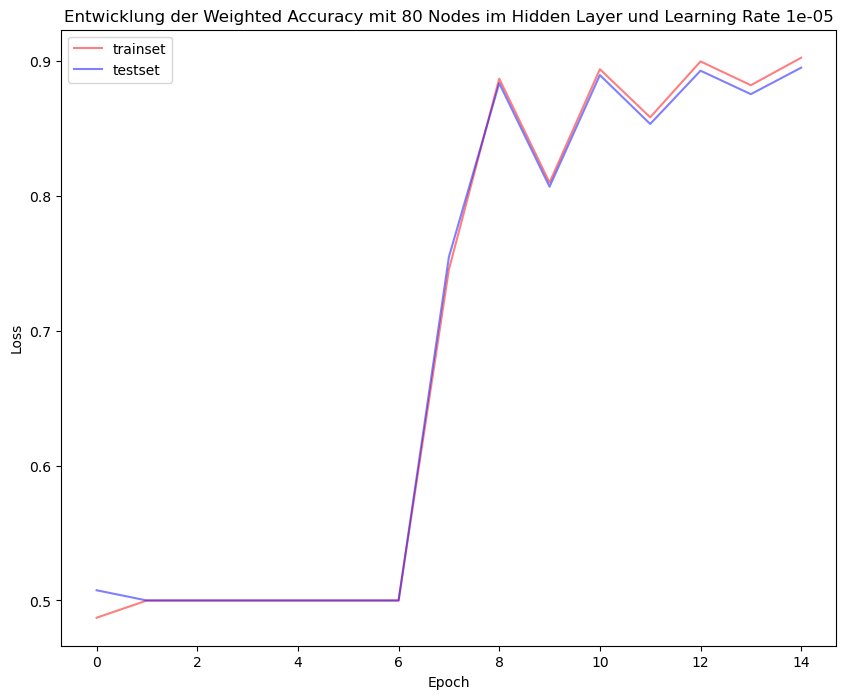

Trainset | Epoch: 1/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 1/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 6/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 11/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------


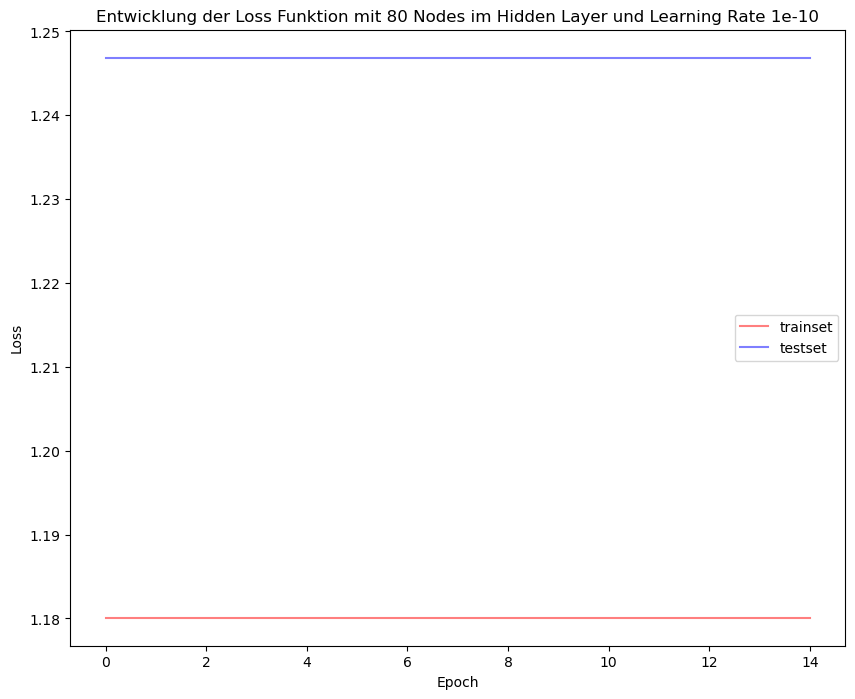

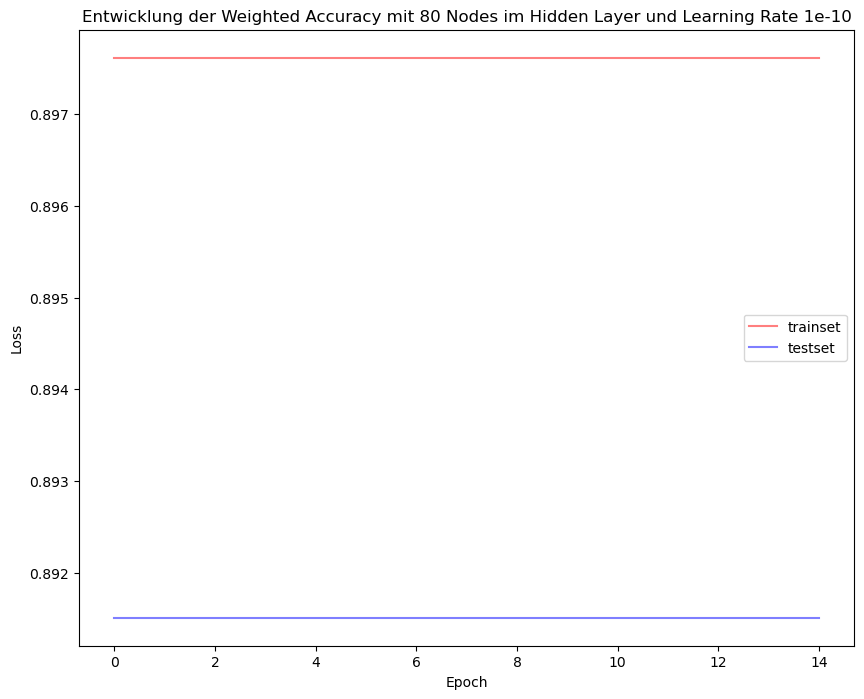

Trainset | Epoch: 1/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 1/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 6/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 11/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------


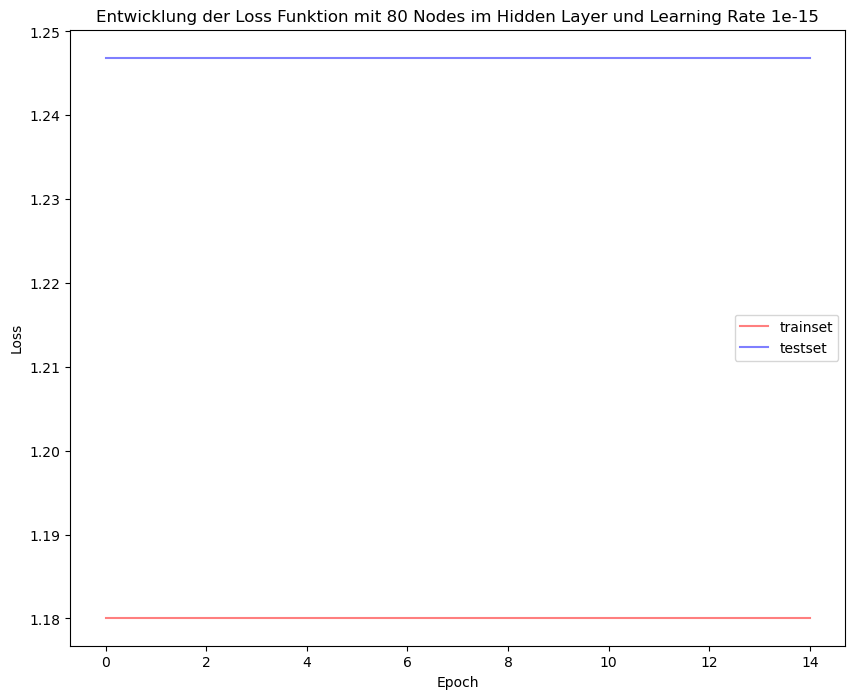

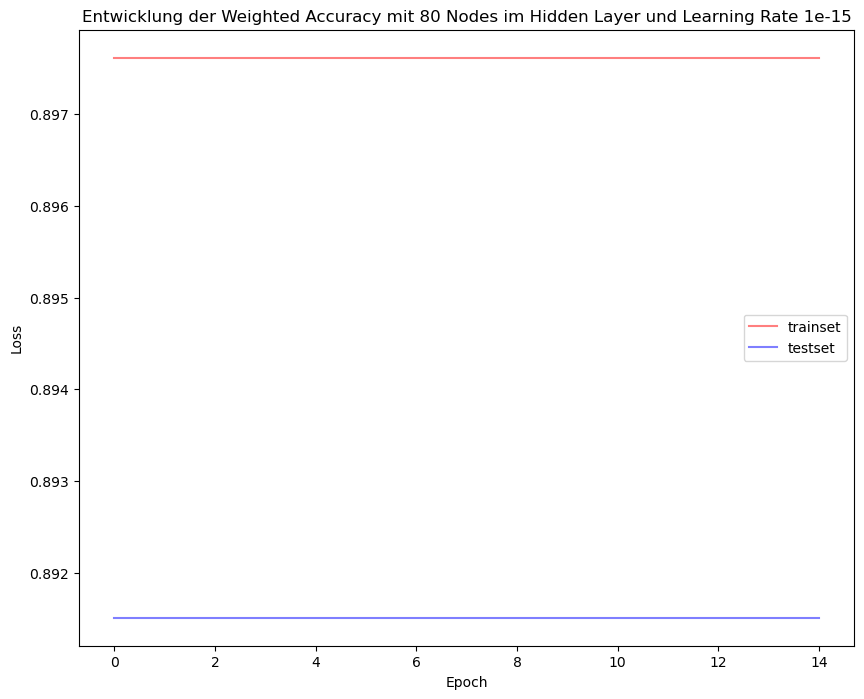

Trainset | Epoch: 1/15 - loss: 2.3508 - accuracy: 0.4965 - w. accuracy: 0.4560 - f1: 0.1357
Testset | Epoch: 1/15 - loss: 2.2492 - accuracy: 0.5095 - w. accuracy: 0.4744 - f1: 0.1471
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/15 - loss: 3.3629 - accuracy: 0.9026 - w. accuracy: 0.5000 - f1: nan
Testset | Epoch: 6/15 - loss: 3.3917 - accuracy: 0.9018 - w. accuracy: 0.5000 - f1: nan
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.8525 - accuracy: 0.9464 - w. accuracy: 0.8941 - f1: 0.7507
Testset | Epoch: 11/15 - loss: 1.9515 - accuracy: 0.9435 - w. accuracy: 0.8897 - f1: 0.7409
----------------------------------------------------------------------------------------------------


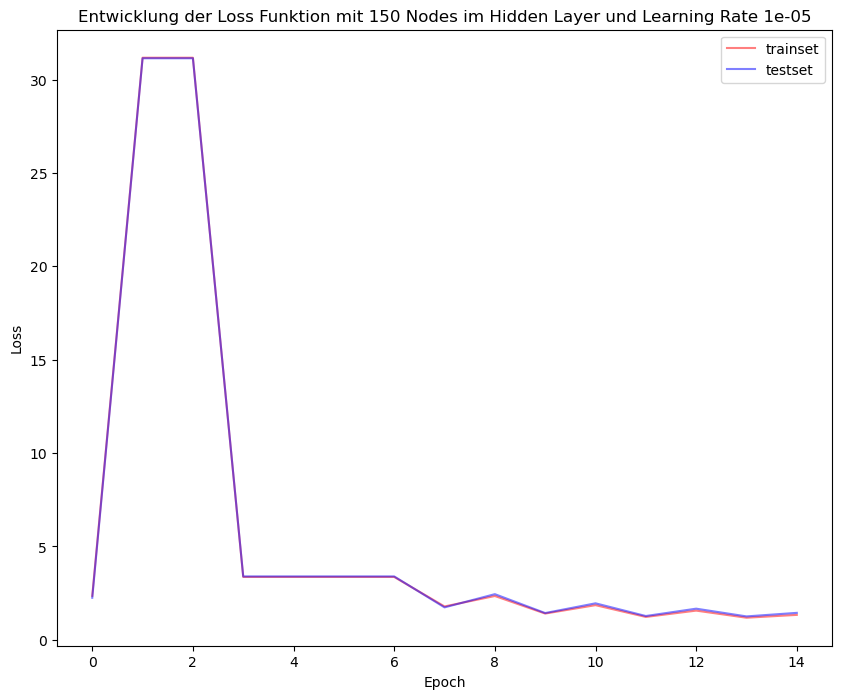

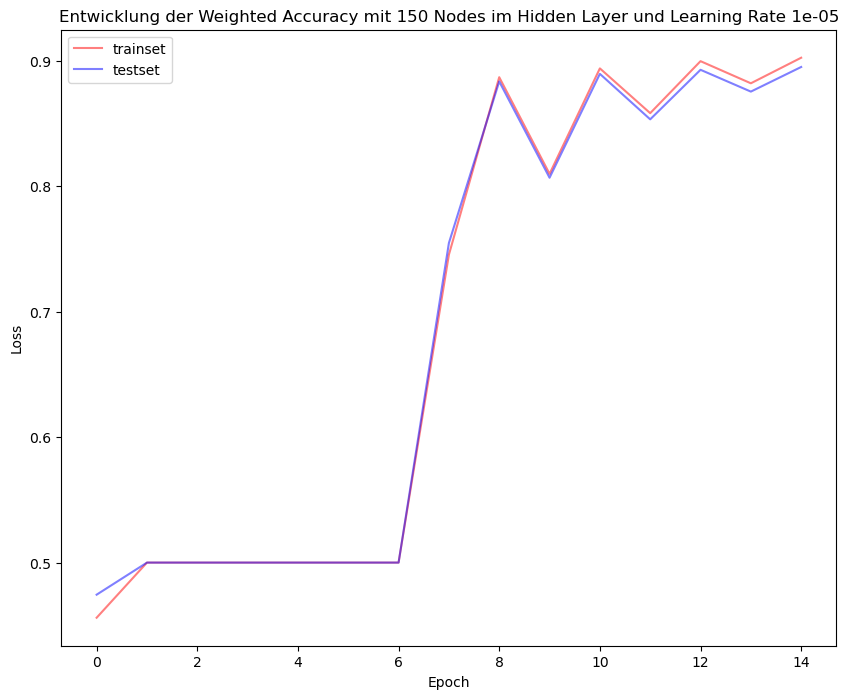

Trainset | Epoch: 1/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 1/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 6/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 11/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------


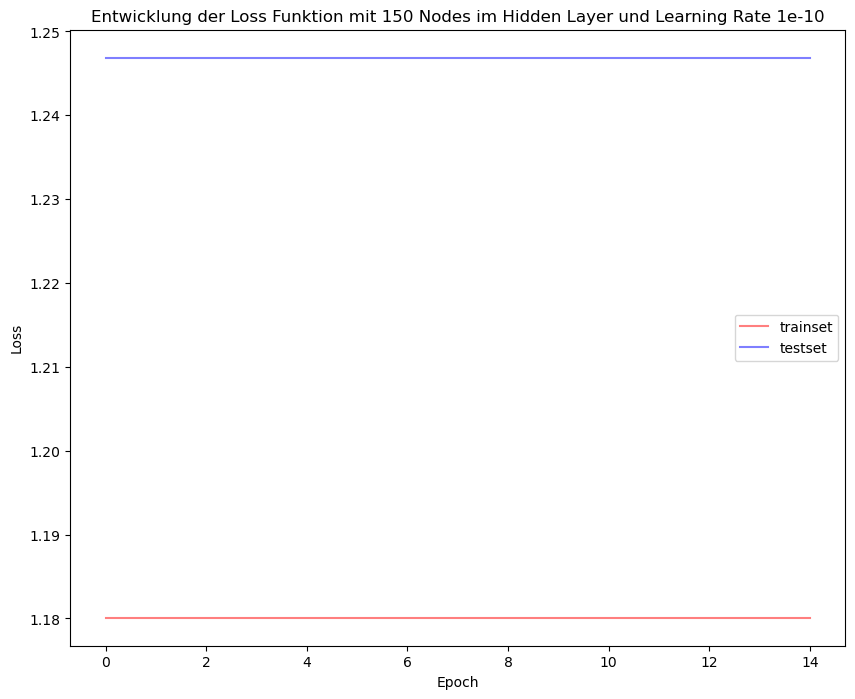

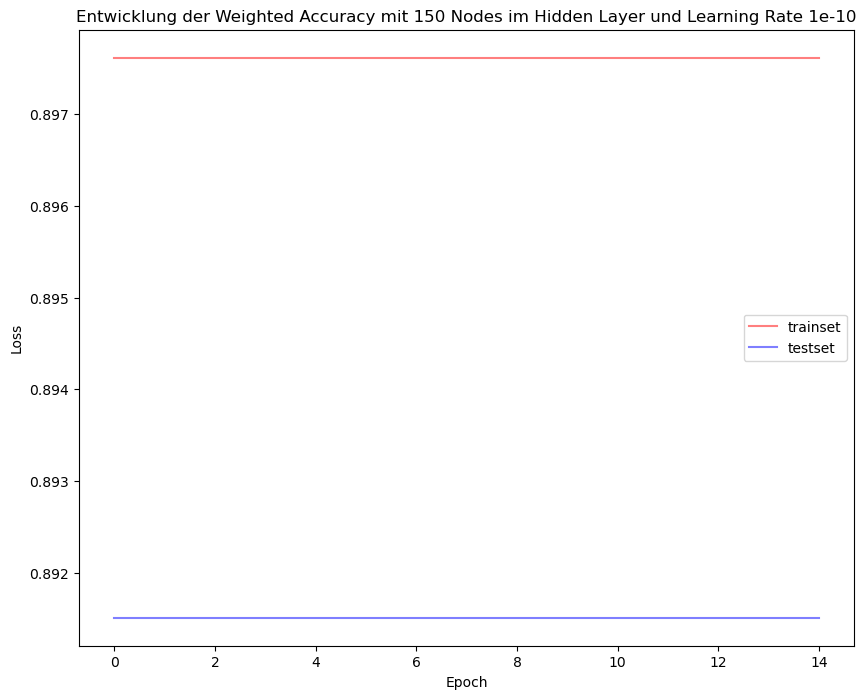

Trainset | Epoch: 1/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 1/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 6/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 11/15 - loss: 1.1801 - accuracy: 0.9658 - w. accuracy: 0.8976 - f1: 0.8225
Testset | Epoch: 11/15 - loss: 1.2469 - accuracy: 0.9639 - w. accuracy: 0.8915 - f1: 0.8134
----------------------------------------------------------------------------------------------------


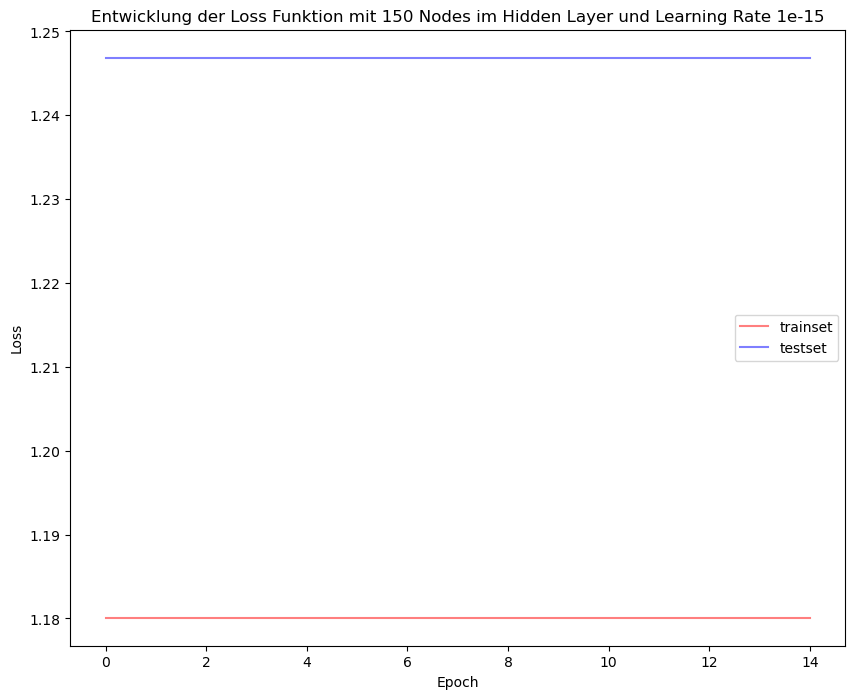

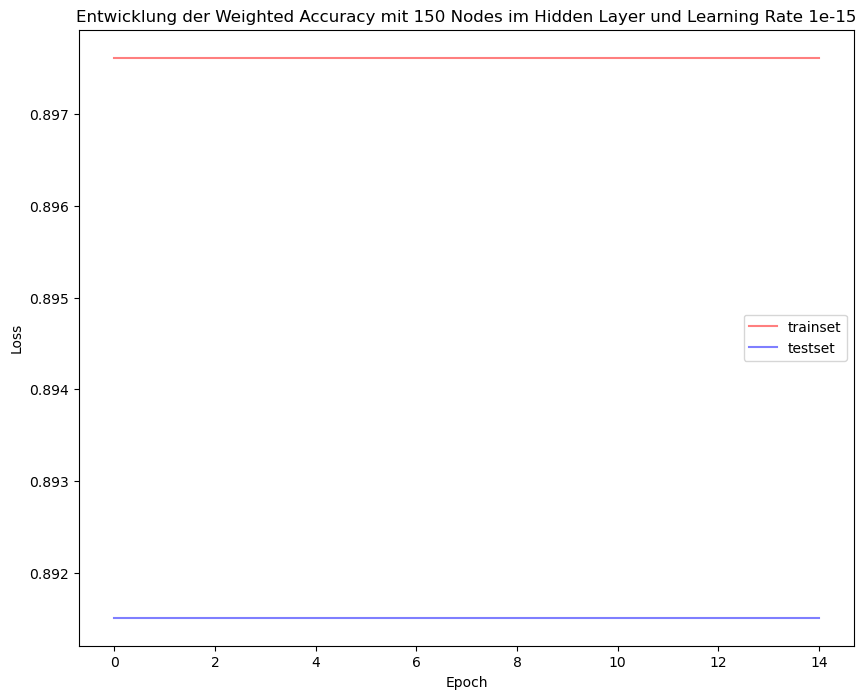

In [23]:
np.random.seed(718)


lst_learnrate = [1e-5, 1e-10, 1e-15]
lst_hidden_nodes = [80, 150]
no_epochs = 15

for nomb_nodes in lst_hidden_nodes:
    net = NeuralNetwork(input_nodes=28*28, hidden_nodes=nomb_nodes)

    for lr_rate in lst_learnrate:
        train(net, epoch = no_epochs, lr = lr_rate, loss_plot = True, w_accuracy_plot = True, verbose=True, no_nodes=nomb_nodes)


In [17]:
# 15. Die Wahl von Lernrate und Hidden Layer-Größe wurde nachvollziehbar entschieden

---

# Aufgabe 5
Erweitern Sie das Netzwerk auf 3 Hidden Layer mit gleicher Größe und 10 Outputs. Das Ziel
ist die korrekte Klassifizierung aller Ziffern. Verwenden Sie eine geeignete Loss-Funktion sowie
Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl
und diskutieren Sie kurz weitere Möglichkeiten. Variieren Sie die Lernrate und die Größe der
Hidden Layer und wählen Sie das beste Ergebnis aus.

**Multi Layer Model**

16) Das Netzwerk wurde auf 3 Hidden Layer mit gleicher, frei wählbarer Größe und 10 Outputs
erweitert.
17) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
18) Die Wahl wurde begründet und mit anderen möglichen Funktionen verglichen.
19) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex).
20) Die geeigneten Loss- und Accuracy-Funktionen wurden korrekt implementiert.
21) Es wurden verschiedene Lernraten und Größen der Hidden Layer sinnvoll ausprobiert.
22) Die Entwicklung der Loss- und Accuracy-Funktionen auf Trainings- und Testdatensätzen
wurde korrekt verfolgt und leicht nachvollziehbar dargestellt?
23) Die Wahl der Hyperparameter wurde nachvollziehbar entschieden und begründet?

In [18]:
# 16. Netzwerk auf 3 Hidden Layer mit gleicher, frei wählbarer Größe und 10 Outputs erweitern

class Softmax:
    """
    The softmax function takes an array of scores as input and converts them to a probability distribution over the classes.
    """
    def __call__(self, x):
        """
        Computes the softmax of the input array.

        Args:
            x (numpy.ndarray): The input array of shape (batch_size, num_classes).

        Returns:
            numpy.ndarray: A probability distribution over the classes.
        """
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)
    
# 17. Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
# 20. Korrekte Implementierung

class CrossEntropyLoss:
    """
    The cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1.
    """
    def __call__(self, output, target):
        """
        Computes the cross-entropy loss.

        Args:
            output (numpy.ndarray): The output of the neural network, a probability distribution over the classes, of shape (batch_size, num_classes).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            float: The average cross-entropy loss over the batch.
        """
        output = np.clip(output, 1e-15, 1 - 1e-15)
        return -np.mean(np.sum(target * np.log(output), axis=1))

    def gradient(self, output, target):
        """
        Computes the gradient of the cross-entropy loss with respect to the output.

        Args:
            output (numpy.ndarray): The output of the neural network, a probability distribution over the classes, of shape (batch_size, num_classes).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            numpy.ndarray: The gradient of the loss with respect to the output, of shape (batch_size, num_classes).
        """
        output = np.clip(output, 1e-15, 1 - 1e-15)
        return output - target


class NeuralNetworkV2:
    """
    A neural network with multiple hidden layers.
    """
    def __init__(self, input_nodes, hidden_nodes):
        """
        Initializes the neural network with the given number of input nodes and hidden nodes.

        Args:
            input_nodes (int): The number of input nodes.
            hidden_nodes (int): The number of hidden nodes per layer.
        """
        self.layer1 = LinearLayer(input_nodes, hidden_nodes, activation_fn=Tanh(), activation_fn_derivative=Tanh().derivative)
        self.layer2 = LinearLayer(hidden_nodes, hidden_nodes, activation_fn=Tanh(), activation_fn_derivative=Tanh().derivative)
        self.layer3 = LinearLayer(hidden_nodes, hidden_nodes, activation_fn=Tanh(), activation_fn_derivative=Tanh().derivative)
        self.layer4 = LinearLayer(hidden_nodes, 10, activation_fn=Softmax(), activation_fn_derivative=None)
        self.loss_fn = CrossEntropyLoss()

    def forward(self, input):
        """
        Performs a forward pass through the neural network.

        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).

        Returns:
            numpy.ndarray: The output of the neural network, a probability distribution over the classes, of shape (batch_size, num_classes).
        """
        out = self.layer1.forward(input)
        out = self.layer2.forward(out)
        out = self.layer3.forward(out)
        out = self.layer4.forward(out)
        return out

    def backward(self, input, target):
        """
        Performs a backward pass through the neural
        
        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            NeuralNetworkV2: The neural network itself.
        """
        output = self.forward(input)
        grad_loss = self.loss_fn.gradient(output, target)
        grad_output = self.layer4.backward(grad_loss)
        grad_output = self.layer3.backward(grad_output)
        grad_output = self.layer2.backward(grad_output)
        grad_input = self.layer1.backward(grad_output)
        return self

    def update(self, learning_rate):
        """
        Updates the parameters of the neural network using gradient descent with the given learning rate.

        Args:
            learning_rate (float): The learning rate.
        """
        self.layer1.update(learning_rate)
        self.layer2.update(learning_rate)
        self.layer3.update(learning_rate)
        self.layer4.update(learning_rate)

    def loss(self, input, target):
        """
        Computes the cross-entropy loss of the neural network on the given input and target.

        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            float: The average cross-entropy loss over the batch.
        """
        output = self.forward(input)
        return self.loss_fn(output, target)

    def accuracy(self, input, target):
        """
        Computes the accuracy of the neural network on the given input and target.

        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            float: The accuracy of the neural network on the given input and target.
        """
        output = self.forward(input)
        predictions = np.argmax(output, axis=1)
        target_labels = np.argmax(target, axis=1)
        hits = np.sum(predictions == target_labels)
        size = target_labels.size
        return hits / size

    def f1_score(self, input, target):
        """
        Computes the F1 score of the neural network on the given input and target.

        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            float: The weighted F1 score of the neural network on the given input and target.
        """
        output = self.forward(input)
        y_pred = np.argmax(output, axis=1)
        y_true = np.argmax(target, axis=1)

        tp = np.zeros_like(np.unique(y_true))
        fp = np.zeros_like(np.unique(y_true))
        fn = np.zeros_like(np.unique(y_true))

        for i in range(len(np.unique(y_true))):
            tp[i] = np.sum((y_pred == i) & (y_true == i))
            fp[i] = np.sum((y_pred == i) & (y_true != i))
            fn[i] = np.sum((y_pred != i) & (y_true == i))

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_per_class = 2 * precision * recall / (precision + recall)
        f1_per_class[np.isnan(f1_per_class)] = 0
        weighted_f1 = np.mean(f1_per_class)

        return weighted_f1

    def weighted_accuracy(self, input, target):
        """
        Computes the weighted accuracy of the neural network on the given input and target.

        Args:
            input (numpy.ndarray): The input to the neural network, of shape (batch_size, num_features).
            target (numpy.ndarray): The true labels, a one-hot encoded array of shape (batch_size, num_classes).

        Returns:
            float: The weighted accuracy of the neural network on the given input and target.
        """
        output = self.forward(input)
        y_pred = np.argmax(output, axis=1)
        y_true = np.argmax(target, axis=1)

        cm = np.zeros((len(np.unique(y_true)), len(np.unique(y_true))))
        
        for i, j in zip(y_true, y_pred):
            cm[i, j] += 1

        # Normalisiere die Zeilen der Konfusionsmatrix
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        # Berechne die gewichtete Genauigkeit
        class_weights = np.sum(target, axis=0) / target.shape[0]
        return np.sum(cm.diagonal() * class_weights)


## Klassenbeschreibung

### Softmax

Die `Softmax` Klasse implementiert die Softmax-Funktion, die eine Wahrscheinlichkeitsverteilung über den Klassen auf Basis eines Arrays von Scores berechnet.

#### Methoden

- `__call__(self, x)`: Berechnet die Softmax-Funktion auf Basis des Eingabe-Arrays `x` und gibt die Wahrscheinlichkeitsverteilung über den Klassen zurück.

### CrossEntropyLoss

Die `CrossEntropyLoss` Klasse implementiert die Cross-Entropy Loss Funktion, die die Performance eines Klassifikationsmodells misst, dessen Ausgabe eine Wahrscheinlichkeitsverteilung zwischen 0 und 1 ist.

#### Methoden

- `__call__(self, output, target)`: Berechnet die Cross-Entropy Loss auf Basis der Ausgabe des neuronalen Netzwerks `output` und der wahren Labels `target`.
- `gradient(self, output, target)`: Berechnet den Gradienten der Cross-Entropy Loss Funktion in Bezug auf die Ausgabe des neuronalen Netzwerks `output`.

### NeuralNetworkV2

Die `NeuralNetworkV2` Klasse implementiert ein neuronales Netzwerk mit mehreren versteckten Schichten.

#### Methoden

- `__init__(self, input_nodes, hidden_nodes)`: Initialisiert das neuronale Netzwerk mit der gegebenen Anzahl von Eingabe- und versteckten Knoten.
- `forward(self, input)`: Führt einen Forward-Pass durch das neuronale Netzwerk aus und gibt die Ausgabe als Wahrscheinlichkeitsverteilung über den Klassen zurück.
- `backward(self, input, target)`: Führt einen Backward-Pass durch das neuronale Netzwerk aus, berechnet den Gradienten der Loss-Funktion und gibt das aktualisierte neuronale Netzwerk zurück.
- `update(self, learning_rate)`: Aktualisiert die Parameter des neuronalen Netzwerks mithilfe von Gradientenabstieg und der gegebenen Lernrate.
- `loss(self, input, target)`: Berechnet die Cross-Entropy Loss des neuronalen Netzwerks auf der gegebenen Eingabe und den wahren Labels.
- `accuracy(self, input, target)`: Berechnet die Genauigkeit des neuronalen Netzwerks auf der gegebenen Eingabe und den wahren Labels.
- `f1_score(self, input, target)`: Berechnet den gewichteten F1-Score des neuronalen Netzwerks auf der gegebenen Eingabe und den wahren Labels.
- `weighted_accuracy(self, input, target)`: Berechnet die gewichtete Genauigkeit des neuronalen Netzwerks auf der gegebenen Eingabe und den wahren Labels.

In [19]:
# 16. Testen des Netzwerkes mit unterschiedlichen Anzahl Neuronen
# Seed setzen
np.random.seed(718)

# Erzeugen einer Instanz
netV2_1 = NeuralNetworkV2(input_nodes=28*28, hidden_nodes=75)
netV2_2 = NeuralNetworkV2(input_nodes=28*28, hidden_nodes=100)
netV2_3 = NeuralNetworkV2(input_nodes=28*28, hidden_nodes=125)

# Erzeugen von numpy Train und numpy test
train_mnist_X = np.array(train_dataset.data.view(-1, 28*28))
test_mnist_X = np.array(test_dataset.data.view(-1, 28*28))

# Umwandeln der Labels in numpy array
train_mnist_y = np.array(train_dataset.targets.reshape(-1, 1))
test_mnist_y = np.array(test_dataset.targets.reshape(-1, 1))

# Transform Labels into one-hot encoded format
train_mnist_y = np.eye(10)[train_mnist_y].reshape(-1, 10)
test_mnist_y = np.eye(10)[test_mnist_y].reshape(-1, 10)

def train(model, epoch = 50, lr = 1e-6, loss_plot = True, verbose = True):
    epoch = epoch
    loss_train_, loss_test_ = [], []
    accuracy_train, accuracy_test = [], []
    w_accuracy_train, w_accuracy_test = [], []
    f1_train_, f1_test_ = [], []

    for i in range(epoch):
        loss_train = model.loss(train_mnist_X, train_mnist_y)
        loss_test = model.loss(test_mnist_X, test_mnist_y)
        loss_train_.append(loss_train)
        loss_test_.append(loss_test)

        train_acc = model.accuracy(train_mnist_X, train_mnist_y)
        test_acc = model.accuracy(test_mnist_X, test_mnist_y)
        accuracy_train.append(train_acc)
        accuracy_test.append(test_acc)

        train_w_acc = model.weighted_accuracy(train_mnist_X, train_mnist_y)
        test_w_acc = model.weighted_accuracy(test_mnist_X, test_mnist_y)
        w_accuracy_train.append(train_w_acc)
        w_accuracy_test.append(test_w_acc)

        f1_train = model.f1_score(train_mnist_X, train_mnist_y)
        f1_test = model.f1_score(test_mnist_X, test_mnist_y)
        f1_train_.append(f1_train)
        f1_test_.append(f1_test)

        # backprop
        model.backward(train_mnist_X, train_mnist_y).update(learning_rate = lr)
        if verbose:
            if i % 5 == 0:
                print(f"Trainset | Epoch: {i+1}/{epoch} - loss: {loss_train:.4f} - accuracy: {train_acc:.4f} - w. accuracy: {train_w_acc:.4f} - f1: {f1_train:.4f}")
                print(f"Testset | Epoch: {i+1}/{epoch} - loss: {loss_test:.4f} - accuracy: {test_acc:.4f} - w. accuracy: {test_w_acc:.4f} - f1: {f1_test:.4f}")
                print("-" * 100)

    # 22. Die Entwicklung der Loss- und Accuracy-Funktionen auf Trainings- und Testdatensätzen verfolgen

    if loss_plot:
        plt.figure(figsize=(10,8))
        plt.plot(range(epoch), loss_train_, label='trainset', alpha = 0.5, color = "red")
        plt.plot(range(epoch), loss_test_, label='testset', alpha = 0.5, color = "blue")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title("Entwicklung der Loss Funktion Verfolgen")
        plt.legend()
        plt.show()


C:\Users\Ben\AppData\Local\Temp\ipykernel_6904\3214890231.py:179: RuntimeWarning: invalid value encountered in divide
  f1_per_class = 2 * precision * recall / (precision + recall)


Trainset | Epoch: 1/10 - loss: 2.4236 - accuracy: 0.0924 - w. accuracy: 0.0924 - f1: 0.0654
Testset | Epoch: 1/10 - loss: 2.4312 - accuracy: 0.0865 - w. accuracy: 0.0865 - f1: 0.0577
----------------------------------------------------------------------------------------------------


C:\Users\Ben\AppData\Local\Temp\ipykernel_6904\3214890231.py:177: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


Trainset | Epoch: 6/10 - loss: 1.4372 - accuracy: 0.6033 - w. accuracy: 0.6033 - f1: 0.5441
Testset | Epoch: 6/10 - loss: 1.4454 - accuracy: 0.5944 - w. accuracy: 0.5944 - f1: 0.5386
----------------------------------------------------------------------------------------------------


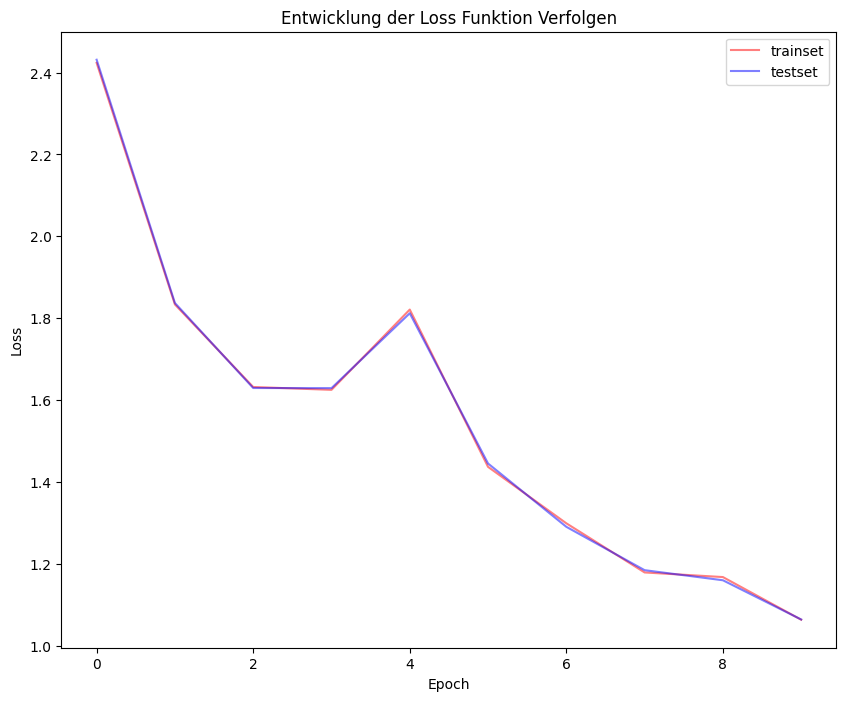

Trainset | Epoch: 1/10 - loss: 2.4697 - accuracy: 0.0698 - w. accuracy: 0.0698 - f1: 0.0592
Testset | Epoch: 1/10 - loss: 2.4707 - accuracy: 0.0697 - w. accuracy: 0.0697 - f1: 0.0578
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 1.1208 - accuracy: 0.7044 - w. accuracy: 0.7044 - f1: 0.6681
Testset | Epoch: 6/10 - loss: 1.1128 - accuracy: 0.7068 - w. accuracy: 0.7068 - f1: 0.6702
----------------------------------------------------------------------------------------------------


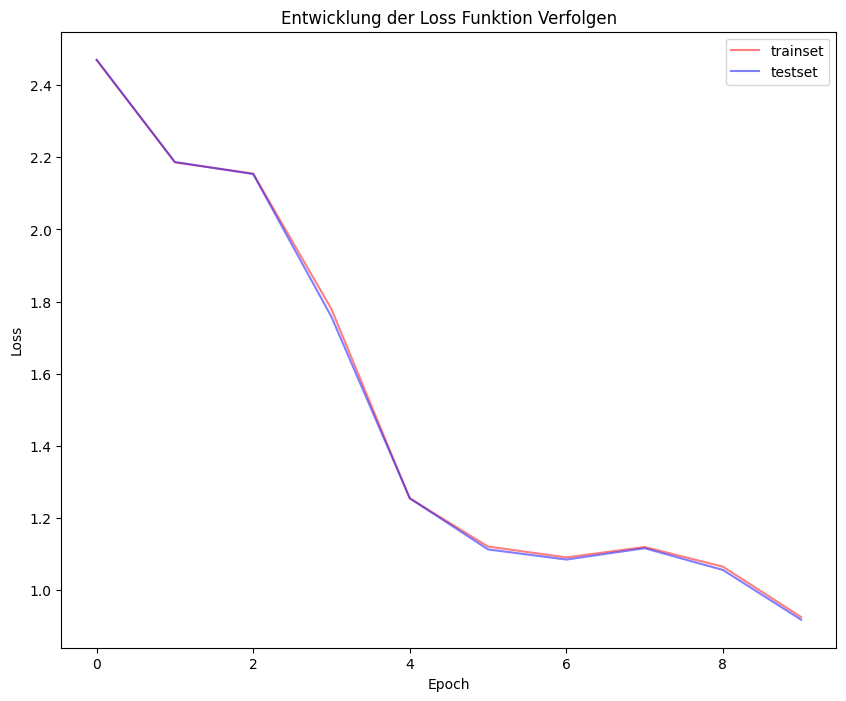

Trainset | Epoch: 1/10 - loss: 2.3763 - accuracy: 0.1139 - w. accuracy: 0.1139 - f1: 0.0941
Testset | Epoch: 1/10 - loss: 2.3701 - accuracy: 0.1195 - w. accuracy: 0.1195 - f1: 0.0982
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 1.6118 - accuracy: 0.4833 - w. accuracy: 0.4833 - f1: 0.4088
Testset | Epoch: 6/10 - loss: 1.6004 - accuracy: 0.4888 - w. accuracy: 0.4888 - f1: 0.4148
----------------------------------------------------------------------------------------------------


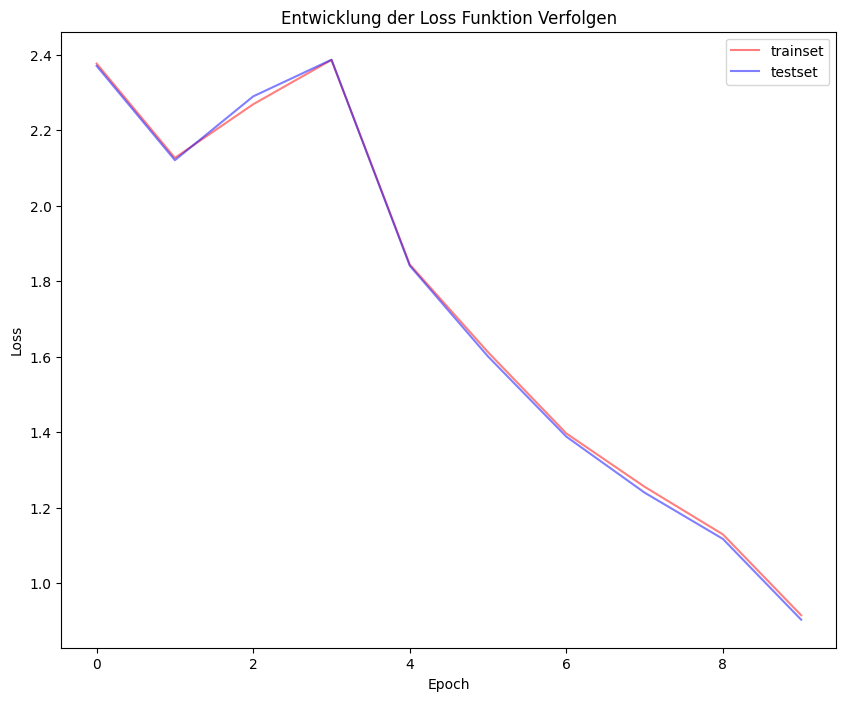

In [20]:
# call train function
train(netV2_1, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)
# train model 2
train(netV2_2, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)
# train model 3
train(netV2_3, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)

Trainset | Epoch: 1/10 - loss: 1.0402 - accuracy: 0.7844 - w. accuracy: 0.7844 - f1: 0.7765
Testset | Epoch: 1/10 - loss: 1.0333 - accuracy: 0.7896 - w. accuracy: 0.7896 - f1: 0.7825
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 0.8714 - accuracy: 0.8150 - w. accuracy: 0.8150 - f1: 0.8095
Testset | Epoch: 6/10 - loss: 0.8645 - accuracy: 0.8228 - w. accuracy: 0.8228 - f1: 0.8175
----------------------------------------------------------------------------------------------------


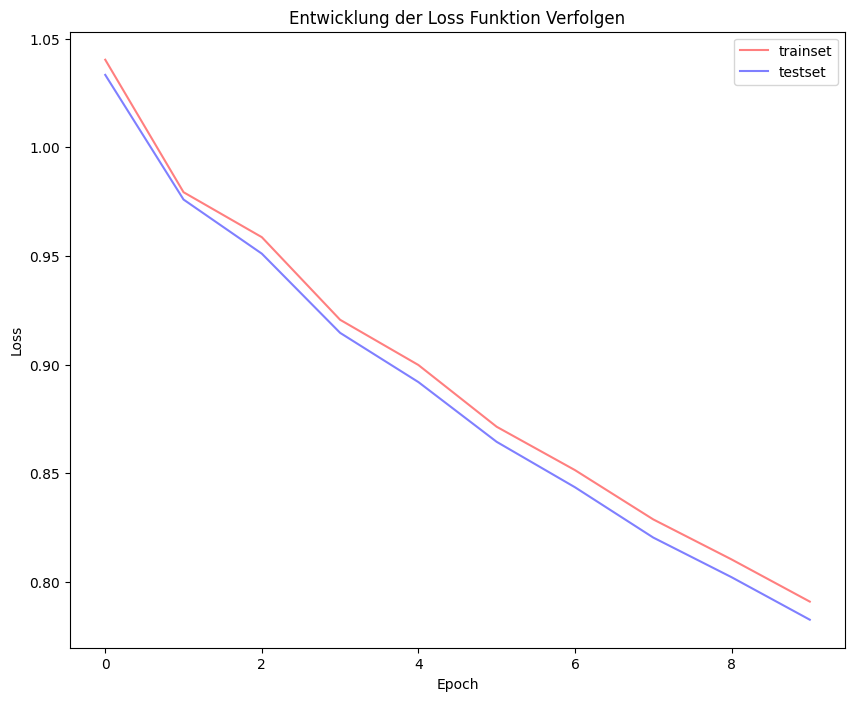

Trainset | Epoch: 1/10 - loss: 0.7746 - accuracy: 0.8316 - w. accuracy: 0.8316 - f1: 0.8276
Testset | Epoch: 1/10 - loss: 0.7665 - accuracy: 0.8421 - w. accuracy: 0.8421 - f1: 0.8385
----------------------------------------------------------------------------------------------------


C:\Users\Ben\AppData\Local\Temp\ipykernel_6904\3214890231.py:179: RuntimeWarning: invalid value encountered in divide
  f1_per_class = 2 * precision * recall / (precision + recall)
C:\Users\Ben\AppData\Local\Temp\ipykernel_6904\3214890231.py:177: RuntimeWarning: invalid value encountered in divide
  precision = tp / (tp + fp)


Trainset | Epoch: 6/10 - loss: 30.9324 - accuracy: 0.1044 - w. accuracy: 0.1044 - f1: 0.0189
Testset | Epoch: 6/10 - loss: 30.9882 - accuracy: 0.1028 - w. accuracy: 0.1028 - f1: 0.0186
----------------------------------------------------------------------------------------------------


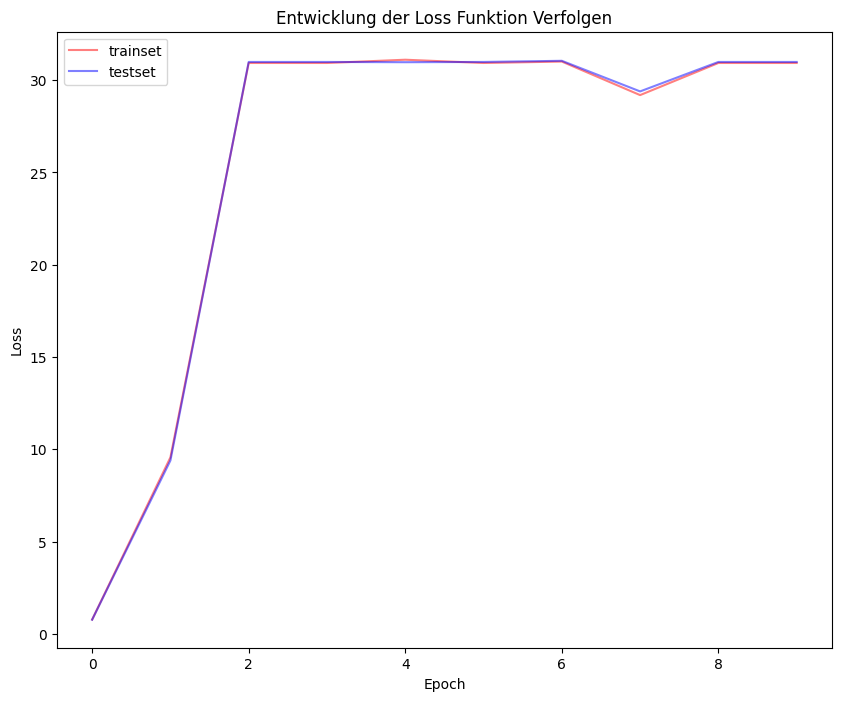

Trainset | Epoch: 1/10 - loss: 27.2543 - accuracy: 0.0986 - w. accuracy: 0.0986 - f1: 0.0180
Testset | Epoch: 1/10 - loss: 27.3469 - accuracy: 0.0958 - w. accuracy: 0.0958 - f1: 0.0175
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 27.2498 - accuracy: 0.0986 - w. accuracy: 0.0986 - f1: 0.0180
Testset | Epoch: 6/10 - loss: 27.3424 - accuracy: 0.0958 - w. accuracy: 0.0958 - f1: 0.0175
----------------------------------------------------------------------------------------------------


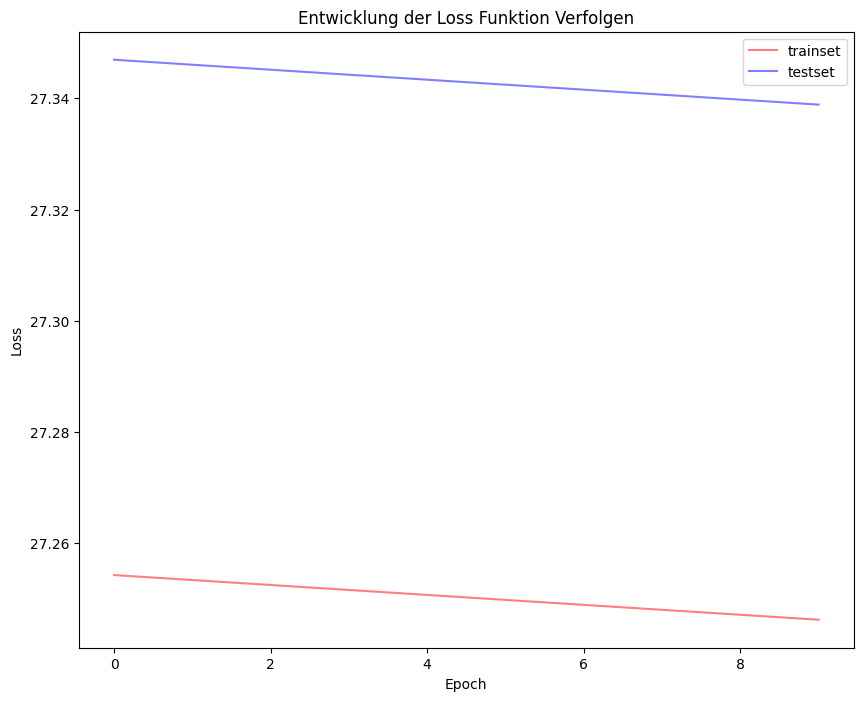

Trainset | Epoch: 1/10 - loss: 0.8426 - accuracy: 0.7861 - w. accuracy: 0.7861 - f1: 0.7783
Testset | Epoch: 1/10 - loss: 0.8365 - accuracy: 0.7887 - w. accuracy: 0.7887 - f1: 0.7806
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 0.6995 - accuracy: 0.8363 - w. accuracy: 0.8363 - f1: 0.8329
Testset | Epoch: 6/10 - loss: 0.6904 - accuracy: 0.8375 - w. accuracy: 0.8375 - f1: 0.8338
----------------------------------------------------------------------------------------------------


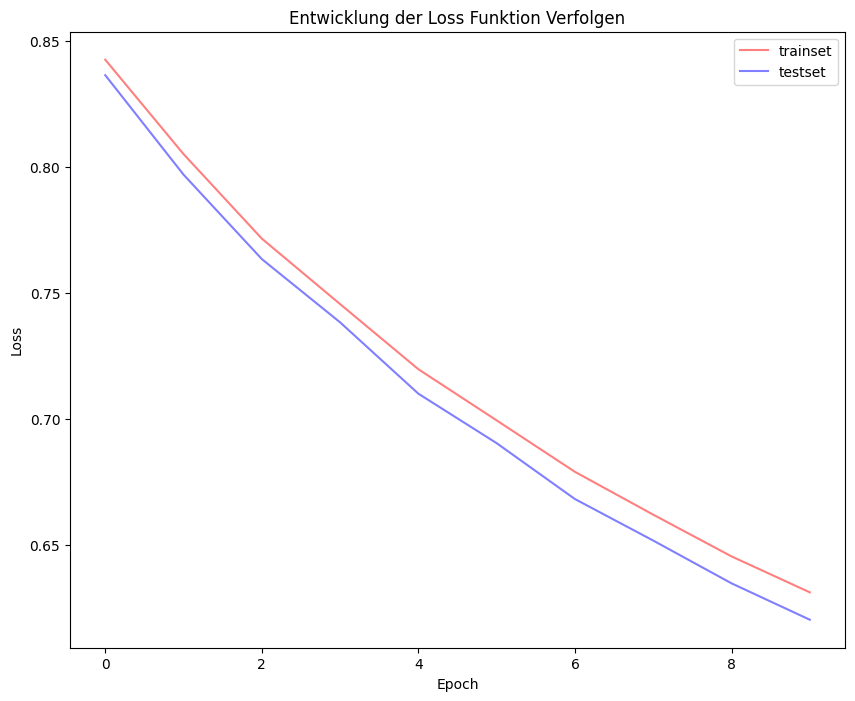

Trainset | Epoch: 1/10 - loss: 0.8910 - accuracy: 0.7349 - w. accuracy: 0.7349 - f1: 0.7200
Testset | Epoch: 1/10 - loss: 0.8768 - accuracy: 0.7363 - w. accuracy: 0.7363 - f1: 0.7215
----------------------------------------------------------------------------------------------------
Trainset | Epoch: 6/10 - loss: 0.6895 - accuracy: 0.8322 - w. accuracy: 0.8322 - f1: 0.8297
Testset | Epoch: 6/10 - loss: 0.6768 - accuracy: 0.8408 - w. accuracy: 0.8408 - f1: 0.8383
----------------------------------------------------------------------------------------------------


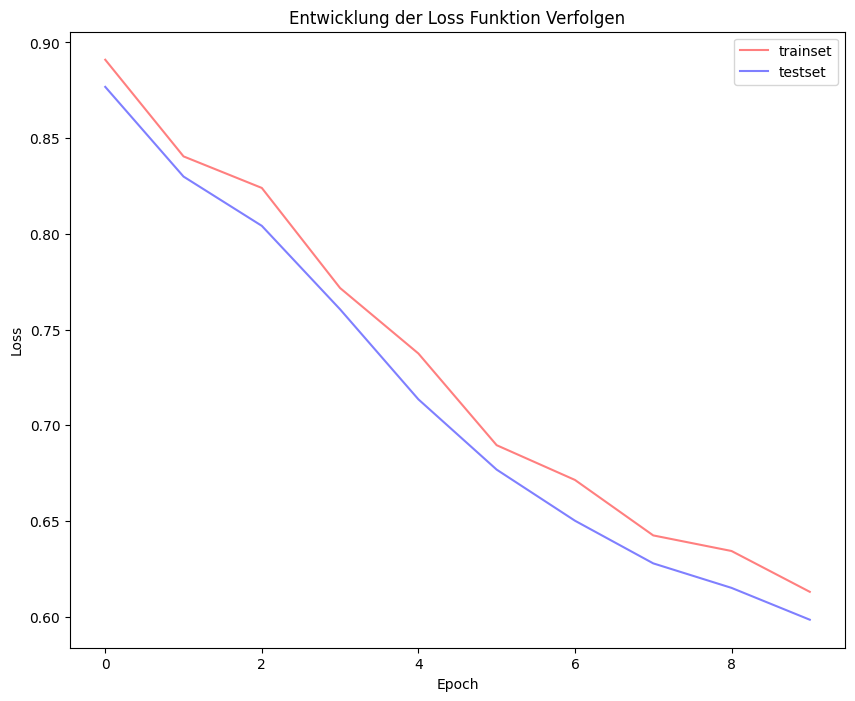

In [21]:
# 23. Wahl der Hyperparameter entscheiden und begründen

# train model 1 with lr = 1e-6
train(netV2_1, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)
# train model 1 with lr = 1e-3
train(netV2_1, epoch = 10, lr = 1e-3, loss_plot = True, verbose=True)
# train model 1 with lr = 1e-9
train(netV2_1, epoch = 10, lr = 1e-9, loss_plot = True, verbose=True)

# train model 2 with lr = 1e-6
train(netV2_2, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)
# train model 3 with lr = 1e-6
train(netV2_3, epoch = 10, lr = 1e-6, loss_plot = True, verbose=True)


## Mathematische Definitionen

19. Mathematische Definition der Loss Funktion und Acuracy-Funktion

Accuracy:

$$
\text{Accuracy} = \frac{\text{Number of correctly classified samples}}{\text{Total number of samples}}
$$
 
Weighted Accuracy:

$$
\text{Weighted Accuracy} = \sum_{i=1}^{C}w_i \times \frac{\text{Number of correctly classified samples for class } i}{\text{Total number of samples for class } i}
$$
 
wobei $C$ die Anzahl der Klassen ist und $w_i$ das Gewicht für die Klasse $i$ darstellt.

$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$
​
wobei

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$
 
und

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$
​
Cross Entropy Loss:

$$
\text{Cross Entropy Loss} = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})
$$

wobei $N$ die Anzahl der Samples, $C$ die Anzahl der Klassen, $y_{ij}$ das Element in der $i$-ten Zeile und $j$-ten Spalte des Target-Arrays und $\hat{y}_{ij}$ das Element in der $i$-ten Zeile und $j$-ten Spalte des Output-Arrays ist.

---

# ChatGPT & Form
Für diese Aufgaben kann ChatGPT als Ressource genutzt werden, um Fragen zu stellen oder bei
Problemen Unterstützung zu erhalten. Vorraussetzung ist, dass Sie transparent kommunizieren,
wo und wie Sie ChatGPT eingesetzt haben und welche Verbesserungen nötig waren. Sie können
ChatGPT wie folgt nutzen:

• Stellen Sie Ihre Fragen klar und präzise.  
• Formulieren Sie Ihre Fragen so, dass sie spezifisch auf Ihre Probleme abgestimmt sind.  
• Seien Sie geduldig und geben Sie ChatGPT genügend Zeit, um eine sinnvolle Antwort zu
generieren.  
• Verwenden Sie die Antworten von ChatGPT als eine Art von Hilfestellung und überprüfen
Sie diese stets auf ihre Richtigkeit.

Wenn Sie eine Frage stellen, die auf eine bestimmte Stelle in Ihrem Code Bezug nimmt, können
Sie den Code zusammen mit Ihrer Frage bereitstellen.

**Form**

24) Das Notebook lässt sich komplett und fehlerfrei ausführen.
25) Es werden nur die Angegebenen Pakete verwendet: numpy, matplotlib; torchvision nur für
das Dataset.
26) Die Ergebnisse werden gut verständlich kommuniziert und kritisch evaluiert.
27) Die Grafiken sind vollständig beschriftet und ohne weiter Erläuterung verständlich.
28) Der Code ist gut strukturiert und verständlich kommentiert.
29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung
eigenständig verständlich ist.
30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und
macht mit den Kommentaren deutlich, wie und wofür ChatGPT und andere Tools verwendet
wurden.